In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [ ]:
prices= pd.read_csv('/content/FB-stock-prices.csv')

In [ ]:
prices.head()

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [ ]:
prices.tail()

,Date,Price
246,12/23/2021,335
247,12/27/2021,346
248,12/28/2021,346
249,12/29/2021,343
250,12/30/2021,344


In [ ]:
prices.dtypes

,0
Date,object
Price,int64


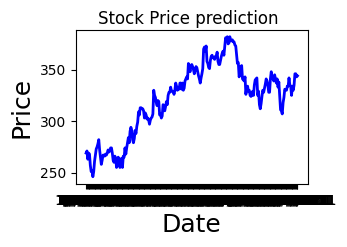

In [ ]:
plt.figure(figsize=(3, 2))
plt.suptitle("Stock Price prediction")
plt.plot(prices['Date'], prices['Price'], label='Predicted Price', color='blue', linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [ ]:
prices.count()

,0
Date,251
Price,251


Data pre-processing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_prices=scaler.fit_transform(prices[["Price"]].values)

In [ ]:
#print(scaled_prices)
total_size=len(scaled_prices)
print(total_size)
test_size =50
print(test_size)
train_size=total_size-test_size
print(train_size)

251
50
201


In [ ]:
training_prices=scaled_prices[0:train_size]

test_prices=scaled_prices[train_size:total_size]


In [ ]:
def create_dataset(data, lookback=1):
  data_x=[]
  data_y=[]
  for i in range(len(data)-lookback-1):
    data_x.append(data[i:(i+lookback),0])
    data_y.append(data[i+lookback,0])
  return numpy.array(data_x), numpy.array(data_y)

In [ ]:
lookback=25
train_req_x, train_req_y= create_dataset(training_prices, lookback)

In [ ]:
train_req_x.shape

(175, 25)

In [ ]:
train_req_x=numpy.reshape(train_req_x, (train_req_x.shape[0], 1, train_req_x.shape[1]))

In [ ]:
print(train_req_x.shape)

(175, 1, 25)


In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import tensorflow as tf

In [ ]:
price_model=Sequential()
price_model.add(SimpleRNN(32, input_shape=(1, lookback)))
price_model.add(Dense(1))

#optimizeeand loss calculation
price_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
price_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
price_model.fit(train_req_x,train_req_y, epochs=5, batch_size=10, verbose=1)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0731 - mse: 0.0731 
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0737 - mse: 0.0737  
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0650 - mse: 0.0650 
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0543 - mse: 0.0543 
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0698 - mse: 0.0698 


In [ ]:
test_req_x, test_req_y= create_dataset(test_prices, lookback)
test_req_x=numpy.reshape(test_req_x, (test_req_x.shape[0], 1, test_req_x.shape[1]))

In [ ]:
predict_on_test=price_model.predict(test_req_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [ ]:
price_model.evaluate(test_req_x, test_req_y, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - loss: 0.1318 - mse: 0.1318


[0.13177703320980072, 0.13177703320980072]

In [ ]:
predicted_value=scaler.inverse_transform(predict_on_test)
print(predicted_value)

[[348.1495 ]
 [331.37036]
 [343.58426]
 [336.32996]
 [337.87665]
 [342.65842]
 [329.68503]
 [332.18808]
 [318.12268]
 [321.81763]
 [325.68323]
 [321.3669 ]
 [327.6023 ]
 [333.66498]
 [335.4473 ]
 [329.21344]
 [337.74985]
 [326.89578]
 [318.63693]
 [328.25735]
 [317.69904]
 [339.52747]
 [332.9111 ]
 [340.15143]]


prediction


In [ ]:
prev_prices=numpy.array([324, 345, 367, 378, 398, 389, 367, 376, 367, 365,
                      378, 398, 367, 376, 345, 355, 366, 377, 377, 388,
                      390, 390, 311, 322, 322])
scaled_prices= scaler.transform(prev_prices.reshape(-1,1))
model_input =numpy.reshape(scaled_prices, (scaled_prices.shape[1], 1, scaled_prices.shape[0]))
pred=price_model.predict(model_input)
stock_pred=scaler.inverse_transform(pred)
print(stock_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[[336.41656]]
